<a href="https://colab.research.google.com/github/Tiago99Vinicius/Tiago99Vinicius/blob/main/Modelo_Ferromagnetico_Ising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Modelo Ferromagnético de Ising para Rede de spin 1/2 em 2D
Neste código, usamos o algorítmo de metrópolis aplicado ao modelo de Ising para simular o comportamento de uma rede de partículas de spin 1/2.

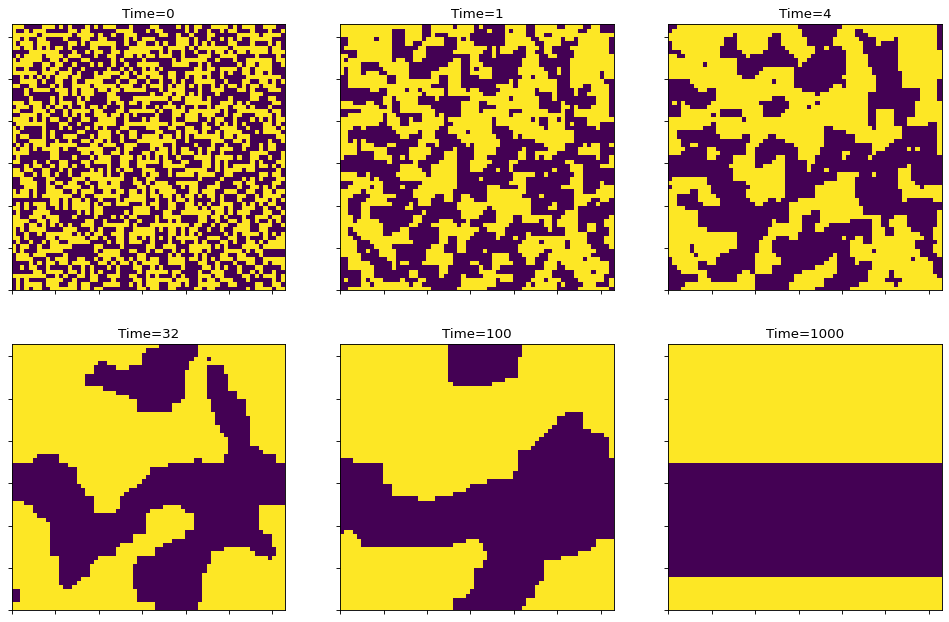

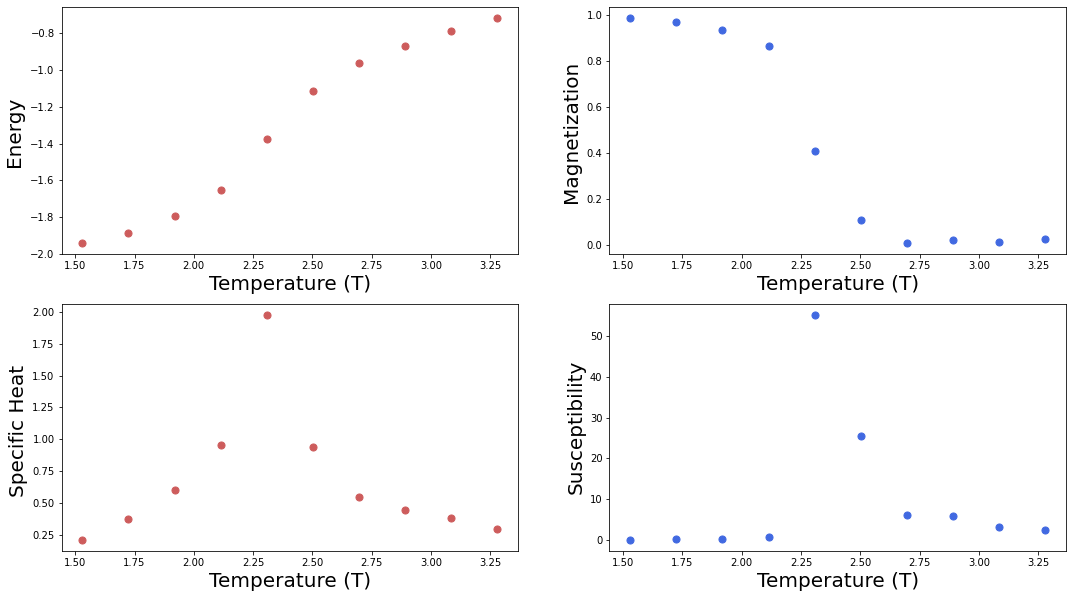

In [ ]:
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
from scipy.sparse import spdiags,linalg,eye

#----------------------------------------------------------------------
##  DEFININDO AS FUNÇÕES QUE SERÃO USADAS AO LONGO DO CÓDIGO
#----------------------------------------------------------------------

def initialstate(N):   
    #gera etados iniciais aleatórios de spin para um grid NxN
    state = 2*np.random.randint(2, size=(N,N))-1
    return state

# Método de Monte Carlo usando Metropolis algorithm 
def mcmove(config, beta):
    for i in range(N):
        for j in range(N):
                a = np.random.randint(0, N)
                b = np.random.randint(0, N)
                s =  config[a, b]
                nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
                cost = 2*s*nb
                
                if cost < 0:
                    s *= -1
                elif rand() < np.exp(-cost*beta):
                    s *= -1
                config[a, b] = s
    return config


#Energia de uma dada configuração
def calcEnergy(config):
    energy = 0 
    
    for i in range(len(config)):
        for j in range(len(config)):
            S = config[i,j]
            nb = config[(i+1)%N, j] + config[i,(j+1)%N] + config[(i-1)%N, j] + config[i,(j-1)%N]
            energy += -nb*S
    return energy/2.  # to compensate for over-counting


#Magnetização de uma dada configuração
def calcMag(config):
    mag = np.sum(config)
    return mag

#----------------------------------------------------------------------
## NOTA: Modificar esse código para uma compilação mais rápida
#----------------------------------------------------------------------

nt      = 10          #  number of temperature points
N       = 25          #  size of the lattice, N x N
eqSteps = 2**10       #  number of MC sweeps for equilibration
mcSteps = 2**10       #  number of MC sweeps for calculation

T       = np.linspace(1.53, 3.28, nt); 
E,M,C,X = np.zeros(nt), np.zeros(nt), np.zeros(nt), np.zeros(nt)
n1, n2  = 1.0/(mcSteps*N*N), 1.0/(mcSteps*mcSteps*N*N) 
# divide by number of samples, and by system size to get intensive values

#----------------------------------------------------------------------
#  MAIN PART OF THE CODE
#----------------------------------------------------------------------


for tt in range(nt):
    config = initialstate(N)         # initialise

    E1 = M1 = E2 = M2 = 0
    iT=1.0/T[tt]; iT2=iT*iT;
    
    for i in range(eqSteps):         # equilibrate
        mcmove(config, iT)           # Monte Carlo moves
                                     # Inverso da temperatura

    for i in range(mcSteps):
        mcmove(config, iT)           
        Ene = calcEnergy(config)     # calculate the energy
        Mag = calcMag(config)        # calculate the magnetisation

        E1 = E1 + Ene
        M1 = M1 + Mag
        M2 = M2 + Mag*Mag 
        E2 = E2 + Ene*Ene


    # divide by number of sites and iteractions to obtain intensive values    
    E[tt] = n1*E1
    M[tt] = n1*M1
    C[tt] = (n1*E2 - n2*E1*E1)*iT2
    X[tt] = (n1*M2 - n2*M1*M1)*iT

#----------------------------------------------------------------------
#  plot the calculated values   
#----------------------------------------------------------------------

%matplotlib inline
# Simulating the Ising model


class Ising():
    ''' Simulating the Ising model '''    
    
    ## monte carlo moves
    def mcmove(self, config, N, beta):
        ''' This is to execute the monte carlo moves using 
        Metropolis algorithm such that detailed
        balance condition is satisified'''
        for i in range(N):
            for j in range(N):            
                    a = np.random.randint(0, N)
                    b = np.random.randint(0, N)
                    s =  config[a, b]
                    nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
                    cost = 2*s*nb
                    if cost < 0:	
                        s *= -1
                    elif rand() < np.exp(-cost*beta):
                        s *= -1
                    config[a, b] = s
        return config
    
    def simulate(self):   
        ''' This module simulates the Ising model'''
        N, temp     = 64, .4        # Initialse the lattice
        config = 2*np.random.randint(2, size=(N,N))-1
        f = plt.figure(figsize=(15, 15), dpi=80);    
        self.configPlot(f, config, 0, N, 1);
        
        msrmnt = 1001
        for i in range(msrmnt):
            self.mcmove(config, N, 1.0/temp)
            if i == 1:       self.configPlot(f, config, i, N, 2);
            if i == 4:       self.configPlot(f, config, i, N, 3);
            if i == 32:      self.configPlot(f, config, i, N, 4);
            if i == 100:     self.configPlot(f, config, i, N, 5);
            if i == 1000:    self.configPlot(f, config, i, N, 6);
                 
#Definindo a função que plota as configurações dos estados ao longo do tempo
    def configPlot(self, f, config, i, N, n_):
        ''' This modules plts the configuration once passed to it along with time etc '''
        X, Y = np.meshgrid(range(N), range(N))
        sp =  f.add_subplot(3, 3, n_ )  
        plt.setp(sp.get_yticklabels(), visible=False)
        plt.setp(sp.get_xticklabels(), visible=False)      
        plt.pcolormesh(X, Y, config, cmap=plt.cm.viridis_r);
        plt.title('Time=%d'%i); plt.axis('tight')    
    plt.show()

rm = Ising()
rm.simulate()
#----------------------------------------------
f = plt.figure(figsize=(18, 10)); #  


sp =  f.add_subplot(2, 2, 1 );
plt.scatter(T, E, s=50, marker='o', color='IndianRed')
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Energy ", fontsize=20);         plt.axis('tight');


sp =  f.add_subplot(2, 2, 2 );
plt.scatter(T, abs(M), s=50, marker='o', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Magnetization ", fontsize=20);   plt.axis('tight');


sp =  f.add_subplot(2, 2, 3 );
plt.scatter(T, C, s=50, marker='o', color='IndianRed')
plt.xlabel("Temperature (T)", fontsize=20);  
plt.ylabel("Specific Heat ", fontsize=20);   plt.axis('tight');   


sp =  f.add_subplot(2, 2, 4 );
plt.scatter(T, X, s=50, marker='o', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Susceptibility", fontsize=20);   plt.axis('tight');
